Task 1:Simple regression
    
predict the percentage of marks that a student is expected to score based upon the number of hours they studied. 
This is a simple linear regression task as it involves just two variables.

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
url="http://bit.ly/w-data"
df=pd.read_csv(url)
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [74]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Text(0, 0.5, 'Scores obtained')

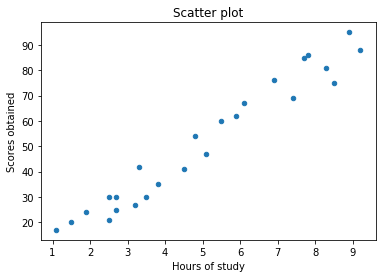

In [75]:
df.plot.scatter(x='Hours', y='Scores')
plt.title('Scatter plot')
plt.xlabel('Hours of study')
plt.ylabel('Scores obtained')

In [76]:
print("Mean of hours of study :",df['Hours'].mean())
print("Mean of Scores obtained :",df['Scores'].mean())
print("Variance of hours of study data : ",df['Hours'].var())
print("Variance of scores obatained of data :",df['Scores'].var())

Mean of hours of study : 5.012
Mean of Scores obtained : 51.48
Variance of hours of study data :  6.3761
Variance of scores obatained of data : 639.4266666666666


In [77]:
X = df.iloc[:, :1].values  
y = df.iloc[:, 1].values  

In [78]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0) 

In [79]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

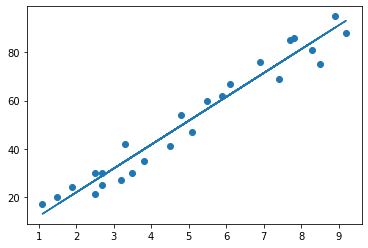

In [80]:
line = regressor.coef_*X+regressor.intercept_
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [81]:
print("Intercept : ",regressor.intercept_)
print("Slope of regression line :",regressor.coef_)

Intercept :  2.018160041434662
Slope of regression line : [9.91065648]


In [82]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


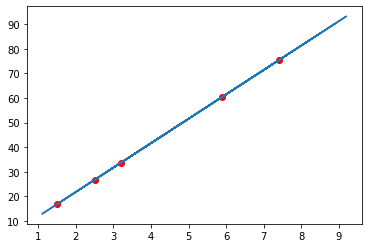

In [83]:
plt.scatter(X_test,y_pred,color='red')
plt.plot(X,line)

In [84]:
output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
output

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [85]:
hrs=9.25
predict=hrs*regressor.coef_+regressor.intercept_
print("The predicted score if student will study 9.25 hours is",float(predict))

The predicted score if student will study 9.25 hours is 93.69173248737539


In [86]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
